# Chapter 8: Deep Auto Encoder

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_4/Chapter8

/content/drive/MyDrive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_4/Chapter8


In [4]:
 import warnings 
 warnings.filterwarnings('ignore')

In [3]:
from IPython.display import Image, SVG 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D 
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape 
from tensorflow.keras import regularizers

In [7]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()
# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value 
x_test = x_test.astype('float32') / max_value

11501568/11490434 [==============================] - 0s 0us/step


In [55]:
 x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [56]:
np.prod(x_train.shape[1:])

784

In [8]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # 28x28 =7 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [9]:
 (x_train.shape, x_test.shape)

((60000, 784), (10000, 784))

In [10]:
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32 # du kien o nut co chai se co 32
compression_factor = float(input_dim) / encoding_dim 
print("Compression factor: %s" % compression_factor)

Compression factor: 24.5


In [60]:
# Deep Autoencoder
autoencoder = Sequential() 

# Encoder Layers
# input 784
autoencoder.add(
      Dense(4*encoding_dim, input_shape=(input_dim,), activation='relu')  
)
autoencoder.add(
      Dense(2*encoding_dim, activation='relu') 
)
autoencoder.add(
      Dense(encoding_dim, activation='relu') # cổ chai 
)

# Decoder Layers
autoencoder.add(
      Dense(2*encoding_dim, activation='relu') 
)
autoencoder.add(
      Dense(4*encoding_dim, activation='relu') 
)
autoencoder.add(
      Dense(input_dim, activation='sigmoid') # ouput: 784
)
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [61]:
# dense_1 = input*output + bias = 784 * 32 + 32 = 25120 # encode
# dense_2 = input*output + bias = 32 * 784 + 784 = 25872 # decode

In [62]:
# Xem thử 784 đưa vào thì còn lại 32, xem xem 32 ở encoder là cái gì, ko thật cần thiết khi chạy mô hình
# Encoder Model
input_img = Input(shape=(input_dim,)) # input image 784
encoder_layer = autoencoder.layers[0] # lay layer encode trong mang autoencoder 
encoder = Model(input_img, encoder_layer(input_img))
# Get encoder
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [63]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 
# Unsupervised learning
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True, # xáo trộn dữ liệu huấn luyện mỗi epoch 
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2494 - val_loss: 0.1695
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1530 - val_loss: 0.1382
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1331 - val_loss: 0.1265
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1240 - val_loss: 0.1187
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1174 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1126 - val_loss: 0.1102
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1095 - val_loss: 0.1068
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1071 - val_loss: 0.1047
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1051 - val_loss: 0.1028
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1032 - val_loss: 0.1013

In [64]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images) # trong

encoded_imgs = encoder.predict(x_test) 
decoded_imgs = autoencoder.predict(x_test)

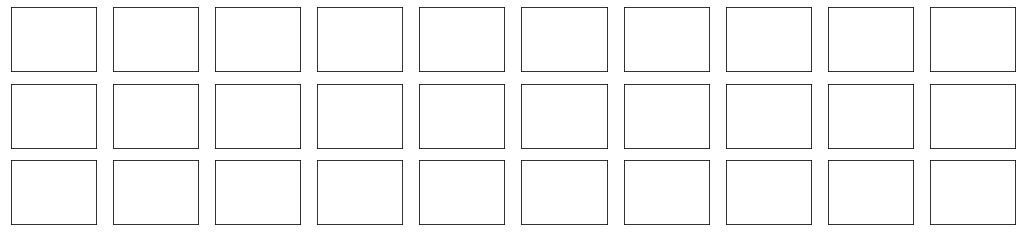

In [65]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
  # plot original image
  ax = plt.subplot(3, num_images, i + 1) # in hinh tren dong 1 plt.imshow(x_test[image_idx].reshape(28, 28)) # tra lai hinh dang ban dau ch plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # plot encoded image
  ax = plt.subplot(3, num_images, num_images + i + 1) # in hinh tren dong 2 plt.imshow(encoded_imgs[image_idx].reshape(8, 4)) # hinh dang co chai 8 * 4 plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # plot reconstructed image
  ax = plt.subplot(3, num_images, 2*num_images + i + 1) # in hinh tren dong 3 plt.imshow(decoded_imgs[image_idx].reshape(28, 28)) # tra lai hinh dang cua plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [66]:
# save model
autoencoder.save('decoder_deep.h5') 
#print("save!!!")

In [67]:
encoder.save('encoder_deep.h5')

In [11]:
# o mot noi nao do...
# Predicting on Test Data, model load from file 
from tensorflow.keras.models import load_model 
encoder = load_model('encoder_deep.h5')
decoder = load_model('decoder_deep.h5')

In [ ]:
num_images = 5
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test) 
decoded_imgs = decoder.predict(x_test)

In [2]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
  # plot original image
  ax = plt.subplot(3, num_images, i + 1) 
  plt.imshow(x_test[image_idx].reshape(28, 28)) 
  plt.gray()
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False)
  # plot encoded image
  ax = plt.subplot(3, num_images, num_images + i + 1) 
  #plt.imshow(encoded_imgs[image_idx].reshape(8, 4)) 
  plt.gray()
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False)
  # plot reconstructed image
  ax = plt.subplot(3, num_images, 2*num_images + i + 1) 
  plt.imshow(decoded_imgs[image_idx].reshape(28, 28)) 
  plt.gray()
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False)
plt.show()

NameError: ignored

In [ ]:
 # Link: # https://ramhiser.com/post/2018-05-14-autoencoders-with-keras/

In [1]:
for i, image_idx in enumerate(random_test_images):
  # plot reconstructed image 
  plt.imshow(decoded_imgs[image_idx].reshape(28, 28)) 
  plt.gray()
  image_name = "demo_Deep/image_" + str(image_idx) + ".jpg" 
  plt.savefig(image_name)
  plt.show()

NameError: ignored